<a href="https://colab.research.google.com/github/Mortezamohasebati/Machine_learning_with_python/blob/main/Copy_of_Diabetes_Preprocessing%26Naive_Bayes_KNN_SVM_RF_DT_LR_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install kaggle --quiet

In [14]:
import pandas as pd
import numpy as np
import os
import zipfile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [15]:
from google.colab import files, drive

In [16]:
kaggle_json_path = '/content/kaggle.json'

In [17]:
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
!cp "{kaggle_json_path}" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [18]:
!kaggle datasets download -d mathchi/diabetes-data-set

Dataset URL: https://www.kaggle.com/datasets/mathchi/diabetes-data-set
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 35.0MB/s]


In [19]:
!ls -lh

total 20K
-rw-r--r-- 1 root root 9.0K Aug  5  2020 diabetes-data-set.zip
-rw-r--r-- 1 root root   73 Nov  8 13:26 kaggle.json
drwxr-xr-x 1 root root 4.0K Nov  5 14:33 sample_data


In [20]:
zip_filename = "diabetes-data-set.zip"
if os.path.exists(zip_filename):
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall("./diabetes-data-set")

In [21]:
!ls -lh diabetes-data-set

total 24K
-rw-r--r-- 1 root root 24K Nov  8 13:27 diabetes.csv


In [22]:
csv_path = "diabetes-data-set/diabetes.csv"  # adjust if filename is different
if not os.path.exists(csv_path):
    # try alternate naming
    possible = [f for f in os.listdir("diabetes-data-set") if f.lower().endswith(".csv")]
    if possible:
        csv_path = os.path.join("diabetes-data-set", possible[0])
    else:
        raise FileNotFoundError("No CSV file found in the unzipped dataset folder.")

df = pd.read_csv(csv_path)

In [23]:
df.shape

(768, 9)

In [24]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [27]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [28]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [29]:
X = np.array(X)
y = np.array(y)

In [30]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [31]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

*italicized text*# Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [37]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.7736156351791531
Test Accuracy: 0.7402597402597403


In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Train Confusion Matrix:
 [[344  59]
 [ 80 131]]
Test Confusion Matrix:
 [[84 13]
 [27 30]]


In [40]:
p = precision_score(y_test, y_pred_test)
r = recall_score(y_test, y_pred_test)
print("Precision:", p)
print("Recall:", r)

Precision: 0.6976744186046512
Recall: 0.5263157894736842


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

results = {}
# ANN
ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

ann.compile(optimizer=Adam(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=50, batch_size=16,
        validation_data=(X_test, y_test), verbose=1)

y_pred_ann = (ann.predict(X_test) > 0.5).astype(int)

print("\n=== Artificial Neural Network (ANN) ===")
print(classification_report(y_test, y_pred_ann))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ann))
print("-" * 40)

results["ANN"] = {
    "Accuracy": accuracy_score(y_test, y_pred_ann),
    "Precision": precision_score(y_test, y_pred_ann),
    "Recall": recall_score(y_test, y_pred_ann),
    "F1": f1_score(y_test, y_pred_ann)
}

#  Logistic Regression (LR)

log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_log),
    'Precision': precision_score(y_test, y_pred_log),
    'Recall': recall_score(y_test, y_pred_log),
    'F1': f1_score(y_test, y_pred_log)
}

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("-" * 40)





#  K-Nearest Neighbors (KNN)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results['KNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1': f1_score(y_test, y_pred_knn)
}
print("=== KNN ===")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("-" * 40)

#  Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1': f1_score(y_test, y_pred_dt)
}
print("=== Decision Tree ===")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("-" * 40)

#  Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1': f1_score(y_test, y_pred_rf)
}
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("-" * 40)

#  Support Vector Machine (SVM)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1': f1_score(y_test, y_pred_svm)
}
print("=== SVM ===")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("-" * 40)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 166ms/step - accuracy: 0.3814 - loss: 0.8663 - val_accuracy: 0.7143 - val_loss: 0.6067
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7025 - loss: 0.5979 - val_accuracy: 0.7143 - val_loss: 0.5542
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7200 - loss: 0.5282 - val_accuracy: 0.7403 - val_loss: 0.5224
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7405 - loss: 0.5211 - val_accuracy: 0.7532 - val_loss: 0.5035
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7764 - loss: 0.4999 - val_accuracy: 0.7468 - val_loss: 0.4986
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7535 - loss: 0.4901 - val_accuracy: 0.7468 - val_loss: 0.4974
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7563 - loss: 0.4758 - val_accuracy: 0.7597 - val_loss: 0.4894
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7976 - loss: 0.4438 - val_accuracy: 0.7532 - val


=== مقایسه نهایی مدل‌ها ===


,Accuracy,Precision,Recall,F1
ANN,0.772727,0.775000,0.543860,0.639175
Logistic Regression,0.746753,0.750000,0.473684,0.580645
KNN,0.740260,0.680851,0.561404,0.615385
Decision Tree,0.766234,0.723404,0.596491,0.653846
Random Forest,0.766234,0.714286,0.614035,0.660377
SVM,0.779221,0.810811,0.526316,0.638298


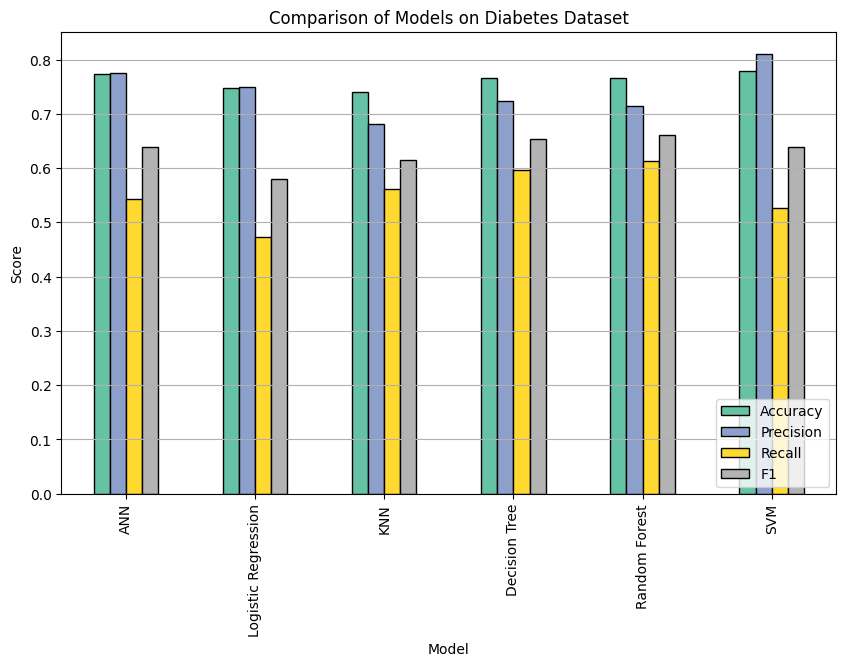

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
results_df = pd.DataFrame(results).T
print("\n=== مقایسه نهایی مدل‌ها ===")
display(results_df)

results_df.plot(kind='bar', figsize=(10,6), edgecolor='black', colormap='Set2')
plt.title("Comparison of Models on Diabetes Dataset")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()
